### Read the transaction data 
read only columns household_key , basket_id, day, product_id, quantity and sales_value 
convert day , quantity and product_id to the smallest appropriate integer types 

In [2]:
import pandas as pd
import numpy as np

In [27]:
path = "../../../project_data/project_transactions.csv"

# specify columns
cols = ["household_key", "BASKET_ID", "DAY", "PRODUCT_ID", "QUANTITY", "SALES_VALUE"]

# specify datatypes to convert 
dtypes = {"DAY": "Int16", "QUANTITY":"Int32", "PRODUCT_ID":"Int32"}

transactions = pd.read_csv(path,
                          dtype=dtypes,
                          usecols=cols)
transactions.head

<bound method NDFrame.head of          household_key    BASKET_ID  DAY  PRODUCT_ID  QUANTITY  SALES_VALUE
0                 1364  26984896261    1      842930         1         2.19
1                 1364  26984896261    1      897044         1         2.99
2                 1364  26984896261    1      920955         1         3.09
3                 1364  26984896261    1      937406         1         2.50
4                 1364  26984896261    1      981760         1         0.60
...                ...          ...  ...         ...       ...          ...
2146306           1598  42305362535  711       92130         1         0.99
2146307           1598  42305362535  711      114102         1         8.89
2146308           1598  42305362535  711      133449         1         6.99
2146309           1598  42305362535  711     6923644         1         4.50
2146310           1598  42305362535  711    14055192         1         6.99

[2146311 rows x 6 columns]>

In [16]:
transactions.describe().round()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE
count,2146311.0,2.146311e+06,2146311.0,2146311.0,2146311.0,2146311.0
mean,1056.0,3.404897e+10,390.0,2884715.0,101.0,3.0
std,605.0,4.723748e+09,190.0,3831949.0,1152.0,4.0
min,1.0,2.698490e+10,1.0,25671.0,0.0,0.0
25%,548.0,3.040798e+10,229.0,917231.0,1.0,1.0
50%,1042.0,3.281176e+10,392.0,1027960.0,1.0,2.0
75%,1581.0,4.012804e+10,555.0,1132771.0,1.0,3.0
max,2099.0,4.230536e+10,711.0,18316298.0,89638.0,840.0


In [17]:
transactions.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   household_key  int64  
 1   BASKET_ID      int64  
 2   DAY            Int16  
 3   PRODUCT_ID     Int32  
 4   QUANTITY       Int32  
 5   SALES_VALUE    float64
dtypes: Int16(1), Int32(2), float64(1), int64(2)
memory usage: 75.7 MB


In [28]:
transactions = (
    transactions
    .assign(date = (pd.to_datetime("2016" , format='%Y')
                    + pd.to_timedelta(transactions['DAY'].sub(1).astype(str) + " days"))
           )
    .drop(["DAY"],axis=1)
)
transactions["date"] = pd.to_datetime(transactions["date"])


In [29]:
transactions.head()

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,date
0,1364,26984896261,842930,1,2.19,2016-01-01
1,1364,26984896261,897044,1,2.99,2016-01-01
2,1364,26984896261,920955,1,3.09,2016-01-01
3,1364,26984896261,937406,1,2.50,2016-01-01
4,1364,26984896261,981760,1,0.60,2016-01-01


### Time based analysis 
- plot the sum of sales by month. Are sales growing over time ?
- Next, plot the same series after filtering down to dates April 2016 and October 2017
- Then, plot the sum of sales 2016 vs the 2017 sales.
- Then, plot total sales by day of week

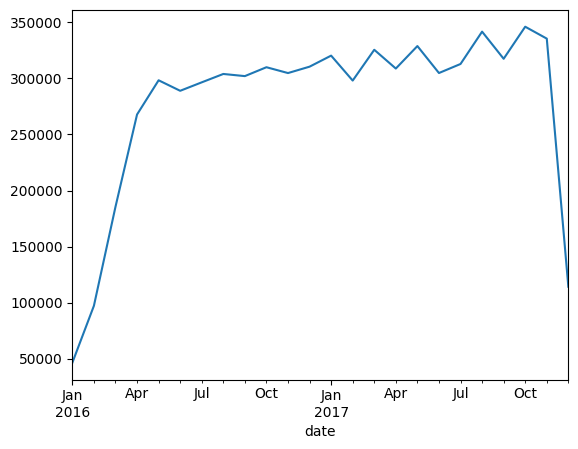

In [32]:
(
    transactions.set_index("date")
    .loc[:, "SALES_VALUE"]
    .resample("ME")
    .sum()
    .plot()
);

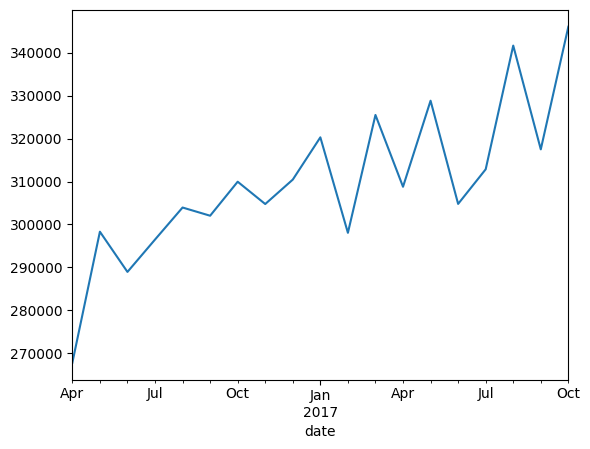

In [35]:
b = transactions.sort_values("date")

(
    transactions
    .set_index("date")
    .loc["2016-04":"2017-10", "SALES_VALUE"]
    .resample("ME")
    .sum()
    .plot()
);

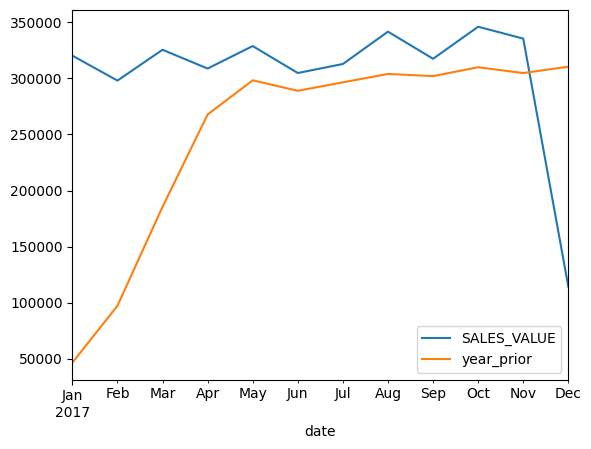

In [39]:
(
    transactions
    .set_index("date")
    .loc[:, ["SALES_VALUE"]]
    .resample("ME")
    .sum()
    .assign(year_prior = lambda x: x["SALES_VALUE"].shift(12))
    .loc["2017"]
    .plot()
);

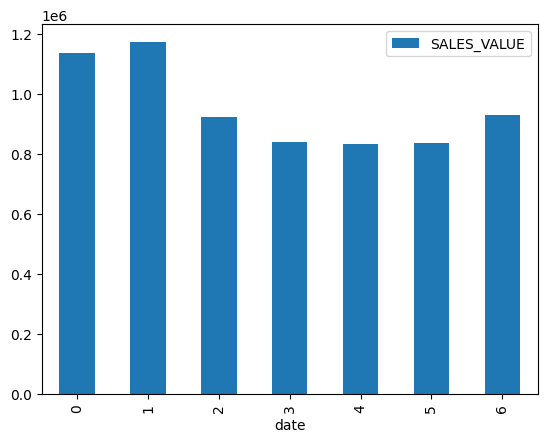

In [40]:
(
    transactions
    .groupby(transactions["date"].dt.dayofweek)
    .agg({"SALES_VALUE":"sum"})
    .plot.bar()
);